In [9]:
#import the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Load the dataset into dataframe
df=pd.read_csv('Employee.csv')

In [11]:
#Inspect the data
print('Having no. of rows and columns in dataset ',df.shape)

Having no. of rows and columns in dataset  (4653, 9)


In [12]:
#Summary of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [13]:
#Decriptive statistics
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [14]:
print(df)

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [15]:
        # Data Cleaning

In [16]:
#drop column
p = df.drop('PaymentTier', axis=1)

In [17]:
#finding missing values
p.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [18]:
#Renamimg column that is too-long  
p=p.rename(columns={'ExperienceInCurrentDomain':'Experience'})

In [19]:
# Sort the Data by column joining year
p=p.sort_values(by='JoiningYear')

In [20]:
print(p)

      Education  JoiningYear       City  Age  Gender EverBenched  Experience  \
2997  Bachelors         2012       Pune   31    Male          No           4   
3090  Bachelors         2012  Bangalore   35  Female          No           1   
3095  Bachelors         2012       Pune   40    Male          No           2   
3096  Bachelors         2012  Bangalore   36    Male          No           3   
1485  Bachelors         2012  Bangalore   24    Male          No           2   
...         ...          ...        ...  ...     ...         ...         ...   
3880  Bachelors         2018  Bangalore   38    Male          No           1   
2795  Bachelors         2018  Bangalore   27    Male          No           5   
2796        PHD         2018  New Delhi   30  Female          No           4   
3293  Bachelors         2018  Bangalore   35    Male          No           1   
2265  Bachelors         2018  Bangalore   29  Female         Yes           2   

      LeaveOrNot  
2997           0  
3

In [21]:
        # Data transformation

In [22]:
#label Encoder use for converting categorical column to numerical
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
p['EverBenched']=l.fit_transform(p['EverBenched'])      # NO is considered as 0 and Yes as 1 by fit_transform function(that learns the unique values and convert labels into numerical form)

In [23]:
#Creating new column that shows working year of employee  
p['YearsSinceJoining'] = 2024 - p['JoiningYear'].astype(int) 

#Creating another column that shows the qualification of emp
import numpy as np
p['Post_Graduated']=np.where(p['Education']=='Masters','Y','N')
print(p)

      Education  JoiningYear       City  Age  Gender  EverBenched  Experience  \
2997  Bachelors         2012       Pune   31    Male            0           4   
3090  Bachelors         2012  Bangalore   35  Female            0           1   
3095  Bachelors         2012       Pune   40    Male            0           2   
3096  Bachelors         2012  Bangalore   36    Male            0           3   
1485  Bachelors         2012  Bangalore   24    Male            0           2   
...         ...          ...        ...  ...     ...          ...         ...   
3880  Bachelors         2018  Bangalore   38    Male            0           1   
2795  Bachelors         2018  Bangalore   27    Male            0           5   
2796        PHD         2018  New Delhi   30  Female            0           4   
3293  Bachelors         2018  Bangalore   35    Male            0           1   
2265  Bachelors         2018  Bangalore   29  Female            1           2   

      LeaveOrNot  YearsSinc

In [24]:
#Filtering data 
pp=p[(p['JoiningYear']==2015) & (p['City']=='Pune')& (p['Experience']>5)]
print(pp)

      Education  JoiningYear  City  Age  Gender  EverBenched  Experience  \
3985  Bachelors         2015  Pune   34    Male            1           7   
3989  Bachelors         2015  Pune   41  Female            0           7   

      LeaveOrNot  YearsSinceJoining Post_Graduated  
3985           0                  9              N  
3989           0                  9              N  


In [25]:
      # Save Cleaned & Transformed Data to New CSV

In [41]:
p.to_csv('emp_1.csv')
x=pd.read_csv('emp_1.csv')
print(x)

      Unnamed: 0  Education  JoiningYear       City  Age  Gender  EverBenched  \
0           2997  Bachelors         2012       Pune   31    Male            0   
1           3090  Bachelors         2012  Bangalore   35  Female            0   
2           3095  Bachelors         2012       Pune   40    Male            0   
3           3096  Bachelors         2012  Bangalore   36    Male            0   
4           1485  Bachelors         2012  Bangalore   24    Male            0   
...          ...        ...          ...        ...  ...     ...          ...   
4648        3880  Bachelors         2018  Bangalore   38    Male            0   
4649        2795  Bachelors         2018  Bangalore   27    Male            0   
4650        2796        PHD         2018  New Delhi   30  Female            0   
4651        3293  Bachelors         2018  Bangalore   35    Male            0   
4652        2265  Bachelors         2018  Bangalore   29  Female            1   

      Experience  LeaveOrNo

In [40]:
         #Data Visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\569447228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=x, palette='viridis')


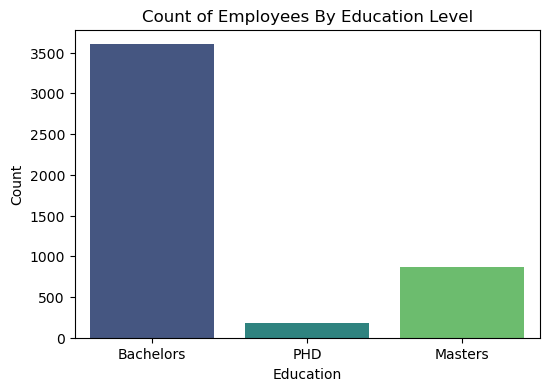

C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\569447228.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EverBenched', data=x, palette='Set2')


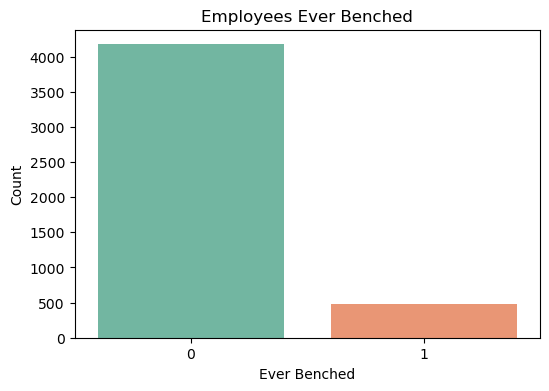

C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\569447228.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LeaveOrNot', data=x, palette='muted')


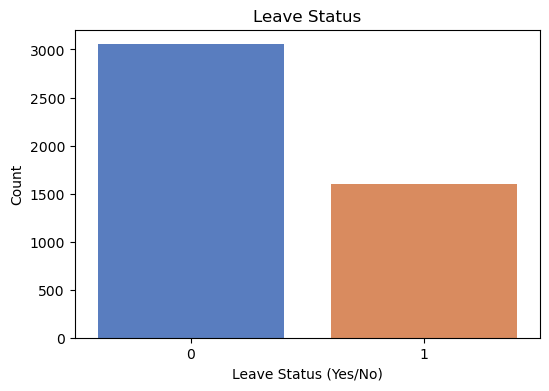

In [42]:
# Count plot for Education
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', data=x, palette='viridis')
plt.title('Count of Employees By Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# Count plot for EverBenched
plt.figure(figsize=(6, 4))
sns.countplot(x='EverBenched', data=x, palette='Set2')
plt.title('Employees Ever Benched')
plt.xlabel('Ever Benched')
plt.ylabel('Count')
plt.show()

# Count plot for LeaveOrNot
plt.figure(figsize=(6, 4))
sns.countplot(x='LeaveOrNot', data=x, palette='muted')
plt.title('Leave Status')
plt.xlabel('Leave Status (Yes/No)')
plt.ylabel('Count')
plt.show()

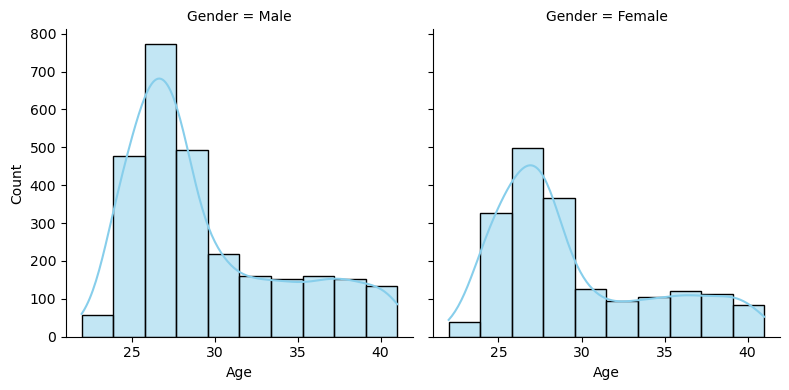

In [29]:
#Age Distribution by gender
g = sns.FacetGrid(x, col='Gender', height=4)
g.map(sns.histplot, 'Age', kde=True, color='skyblue',bins=10)
plt.show()

In [30]:
   # Upload the manipulated data and script to the cloud storage of GCP

In [31]:
!pip install google-cloud

In [32]:
from google.cloud import storage
from google.oauth2 import service_account


In [33]:
#Set google cloud project id and service account key file path
project_id='banded-badge-441114-v'
service_account_key_path=r'C:\Users\Admin\Desktop\banded-badge-441114-v1-1ab76a2cafab.json'  

In [34]:
# Specify your bucket name and the file path
bucket_name = 'bucket_s123'
local_file_path = r'emp_1.csv'
destination_blob_name = 'aj.csv'

In [35]:
# Initialize the Google Cloud Storage client with the service account credentials
credentials = service_account.Credentials.from_service_account_file(service_account_key_path)
client = storage.Client(project=project_id, credentials=credentials)

In [36]:
# Get the bucket object
bucket = client.get_bucket(bucket_name)

# Create a blob object from the destination path in the bucket
blob = bucket.blob(destination_blob_name)

In [37]:
# Upload the file  to the GCS bucket
try:
    blob.upload_from_filename(local_file_path)
    print(f"File {local_file_path} uploaded to {destination_blob_name}.")
except Exception as e:
    print(f"Error uploading file: {e}")

File emp_1.csv uploaded to aj.csv.
